<a href="https://colab.research.google.com/github/shahdabuhassanien/london-weather-analysis/blob/main/(Core)Resampling_Datetime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This dataset contains daily weather observations, including precipitation, temperature (mean, minimum, maximum), and snow depth, recorded over time."

In [ ]:
import pandas as pd

In [ ]:
fpath="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df=pd.read_csv(fpath)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df["date"]=pd.to_datetime(df["date"], format='%Y%m%d')
df.set_index("date",inplace=True)


In [ ]:
df.tail()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
2020-12-31,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [ ]:
# Filter out only the required data: Keep only data from the year 2000 or later.Keep only the following features:['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df_new=df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df_new.tail()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN
2020-12-30,0.0,2.7,-0.1,5.6,NaN
2020-12-31,0.0,-0.8,-3.1,1.5,NaN


In [ ]:
df_new[df_new.isna().any(axis=1)]

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-17,NaN,NaN,NaN,NaN,NaN
2000-01-20,NaN,NaN,NaN,NaN,NaN
2000-01-28,NaN,NaN,NaN,NaN,NaN
2000-02-26,NaN,NaN,NaN,NaN,NaN
2000-03-25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [ ]:
df_new=df_new.interpolate()
df_new.isna().sum()

In [ ]:
df_test=df_new.copy()

Q1: What month had the most precipitation between 2000 through 2010?
<!--
هان بدنا نشوف شو هو الشهر الي فيه اعلى كمية امطار من 2000 ل 2010

1. بدنا ناخد ل داتا من 2000 ل 2010
2. نعمل ريسامبل ل العمود تبع هطول الامطار ل منث ونعمله سم لانه بحكيلي اعلى كمية هطول امطار
3. نجيب ل idmax ونطلع البيانات -->

In [ ]:
# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
# ملاحظة مهمة هان لما اعمل هيك راح يسير في عنا نل فاليو لانه بسير يحاول العمود الي انا عملته ريسامبل
# مع فهرس داتا سيت ل جديدة ف بسير يضيف الايام الي ناقصة او مش موجودة بعد ريسامبل ويحطهاع ندها نن



# df_test["precipitation"]=df_test["precipitation"].resample("M").sum()
# df_test["precipitation"]

In [ ]:

import matplotlib.ticker as mticks
import matplotlib.dates as mdates
def plot_dates(ts,figsize=(25,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first

    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(ts.index,ts.values);

    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%m")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontsize=xtick_fontsize,
                       fontweight=xtick_fontweight)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    ax.set_xlim(ts.index[0], ts.index[-1])

    return fig,ax


In [ ]:
precipitation_years=df_test["precipitation"].loc["2000":"2010"]

In [ ]:
resampled_prec=precipitation_years.resample("MS").sum()
resampled_prec

In [ ]:
max_precipitation=resampled_prec.idxmax()
df_test.loc[max_precipitation]

,2000-10-01
precipitation,10.0
mean_temp,13.2
min_temp,7.7
max_temp,15.3
snow_depth,0.0


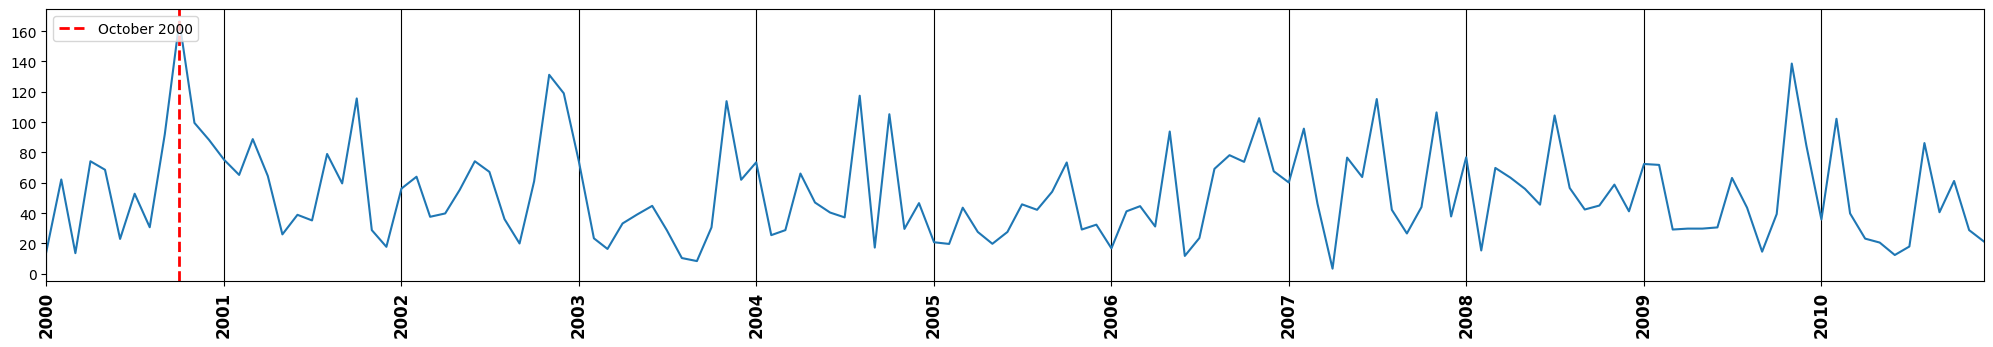

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plot_dates(resampled_prec)
ax.axvline(max_precipitation,color='red', linestyle='--', linewidth=2,label=f'{max_precipitation.strftime("%B %Y")}')
ax.legend(loc='upper left')
plt.show()

Q2: Which year between 2000-2020 had the coolest average temperature?
<!-- 1. اول اشي راح ناخد من 2000 ل 2020
      2. mean tem راح نعمل ريسامبل ل year
      
      3.نجيب ل ايديماكس-->
    

In [ ]:
resampled_temp=df["mean_temp"].resample("y").mean()
resampled_temp

/tmp/ipython-input-2179337074.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled_temp=df["mean_temp"].resample("y").mean()


,mean_temp
date,
1979-12-31,9.986575
1980-12-31,10.370492
1981-12-31,10.320000
1982-12-31,10.998904
1983-12-31,11.237260
1984-12-31,10.942350
1985-12-31,10.095890
1986-12-31,9.998356
1987-12-31,10.287945


In [ ]:
resampled_temp=resampled_temp.loc["2000":"2020"]

In [ ]:
coolest_temp=resampled_temp.idxmin()
df_test.loc[coolest_temp]

,2010-12-31
precipitation,0.0
mean_temp,5.9
min_temp,5.0
max_temp,7.2
snow_depth,0.0


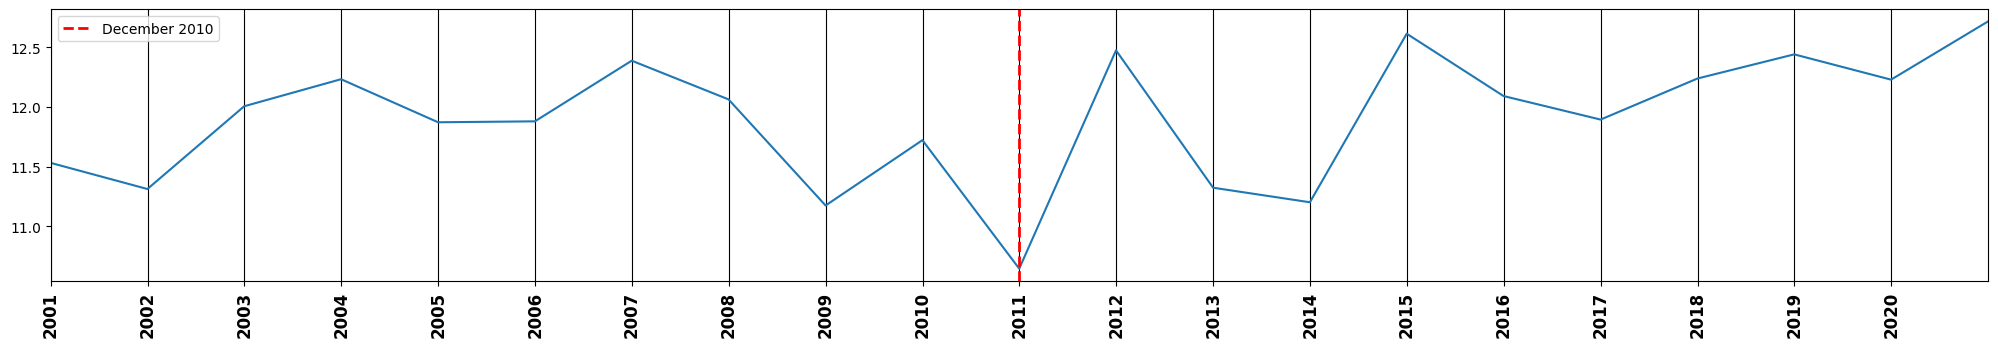

In [ ]:
fig, ax = plot_dates(resampled_temp)
ax.axvline(coolest_temp,color='red', linestyle='--', linewidth=2,label=f'{coolest_temp.strftime("%B %Y")}')
ax.legend(loc='upper left')